<a href="https://colab.research.google.com/github/SATYAM-KUMAR722/pneumonia-cnn-detection/blob/main/Chest_Xray_Pneumonia_DenseNet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chhorakr
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [00:21<00:00, 116MB/s]

In [4]:
import os
import random
import hashlib
import shutil
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121


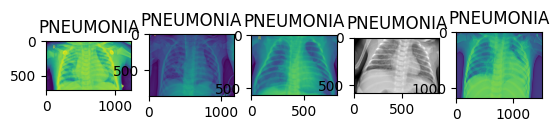

In [5]:

train_dir = "chest-xray-pneumonia/chest_xray/train"
train_data = os.listdir(train_dir)
for classes in train_data:
  class_path = os.path.join(train_dir,classes)
  img_name = os.listdir(class_path)
  random5 = random.sample(img_name,5)
  for index , image in enumerate(random5):
         image_path = os.path.join(class_path,image)
         img = Image.open(image_path)
         plt.subplot(1,5,index+1)
         plt.imshow(img)
         plt.title(classes)

In [6]:
for root, dirs, files in os.walk("chest-xray-pneumonia/chest_xray"):
    for file in files:
        if file.startswith("._") or "__MACOSX" in root:
            os.remove(os.path.join(root, file))

shutil.rmtree("chest-xray-pneumonia/chest_xray/__MACOSX", ignore_errors=True)
shutil.rmtree("chest-xray-pneumonia/chest_xray/chest_xray", ignore_errors=True)

print("Cleanup done ✔️")


Cleanup done ✔️


In [7]:

import hashlib

def hasher_images(file_path):
    with open(file_path,'rb') as f:  # image is in binary form so use 'rb'
        img = f.read()               # read entire file as bytes
    hashed = hashlib.md5(img)        # create MD5 hash from bytes
    return hashed.hexdigest()        # return hash string


duplicate = []
images = {}
for root, dirs , files in os.walk("chest-xray-pneumonia/chest_xray"):
    for file in files:
        img_path = os.path.join(root,file)
        hash_value = hasher_images(img_path)

        if hash_value in images:
            duplicate.append((hash_value,img_path))
        else:
            images[hash_value] = img_path

In [8]:
len(duplicate)

32

In [9]:
# Deleting Duplicates
for hash_value,img_path in duplicate:
    duplicate_img_path = img_path

    if os.path.exists(duplicate_img_path):
        try:
            os.remove(duplicate_img_path)
        except Exception as e:
            print("Error ",e)

print("Duplicate image are removed")

Duplicate image are removed


In [10]:

import hashlib

def hasher_images(file_path):
    with open(file_path,'rb') as f:  # image is in binary form so use 'rb'
        img = f.read()               # read entire file as bytes
    hashed = hashlib.md5(img)        # create MD5 hash from bytes
    return hashed.hexdigest()        # return hash string


duplicate = []
images = {}
for root, dirs , files in os.walk("chest-xray-pneumonia/chest_xray"):
    for file in files:
        img_path = os.path.join(root,file)
        hash_value = hasher_images(img_path)

        if hash_value in images:
            duplicate.append((hash_value,img_path))
        else:
            images[hash_value] = img_path

In [11]:
len(duplicate)

0

In [12]:
# Number of images in training folder

train_dir = "chest-xray-pneumonia/chest_xray/train"
train_data = os.listdir(train_dir)
for classes in train_data:
    class_path = os.path.join(train_dir,classes)
    img_name = os.listdir(class_path)
    print(f"Number of images in {classes}: {len(img_name)}")

Number of images in NORMAL: 1340
Number of images in PNEUMONIA: 3850


In [13]:
# Number of images in testing folder

test_dir = "chest-xray-pneumonia/chest_xray/test"
test_data = os.listdir(test_dir)
for classes in test_data:
    class_path = os.path.join(test_dir,classes)
    img_name = os.listdir(class_path)
    print(f"Number of images in {classes}: {len(img_name)}")

Number of images in NORMAL: 231
Number of images in PNEUMONIA: 387


In [14]:

# Number of images in validation folder

val_dir = "chest-xray-pneumonia/chest_xray/val"
val_data = os.listdir(val_dir)
for classes in val_data:
    class_path = os.path.join(val_dir,classes)
    img_name = os.listdir(class_path)
    print(f"Number of images in {classes}: {len(img_name)}")

Number of images in NORMAL: 8
Number of images in PNEUMONIA: 8


In [15]:
# Checking the image size

file_size = set()
for root,dirs, files in os.walk("chest-xray-pneumonia/chest_xray"):
    for file in files:
        img_path = os.path.join(root,file)

        with open(img_path,"rb") as img:
            image = Image.open(img_path)
            image_size = image.size
            file_size.add(image_size)

print(file_size)

{(976, 544), (1994, 1839), (848, 624), (1416, 816), (1454, 1071), (1488, 984), (1762, 1224), (880, 576), (1532, 1256), (1794, 1176), (1496, 1333), (1318, 1067), (1630, 1333), (1592, 1041), (1364, 805), (1016, 616), (1856, 1496), (2434, 2376), (1778, 1168), (1322, 1037), (1328, 968), (1854, 1572), (1562, 1284), (1400, 1136), (920, 648), (1408, 960), (1712, 1488), (1786, 1437), (1360, 920), (1846, 1488), (1624, 1375), (1232, 1000), (872, 608), (1440, 800), (2746, 2382), (796, 469), (1136, 654), (1857, 1317), (888, 552), (1400, 1221), (1754, 1341), (840, 512), (2022, 1384), (1720, 1348), (792, 584), (1360, 776), (1542, 1341), (2096, 1864), (1256, 984), (928, 624), (1850, 1314), (1616, 1147), (1742, 1372), (760, 488), (812, 678), (1312, 1144), (1654, 1259), (2000, 1896), (2474, 2224), (1272, 928), (1224, 888), (1890, 1615), (1504, 1171), (816, 568), (1736, 1328), (1176, 960), (1256, 840), (928, 480), (2280, 2066), (1803, 1238), (1312, 1000), (832, 512), (1240, 752), (1806, 1392), (1400, 70

In [16]:

 # Checking the file size

unique_file_size = set()
for root,dirs, files in os.walk("chest-xray-pneumonia/chest_xray"):
    for file in files:
        img_path = os.path.join(root,file)
        try:
           file_size = os.path.getsize(img_path)/1024
           unique_file_size.add(file_size)
        except Exception as e:
            print("Error ",e)

print(unique_file_size)
print(sorted(unique_file_size))

{5.38671875, 5.51171875, 7.9609375, 8.736328125, 9.958984375, 10.384765625, 11.7392578125, 12.2021484375, 13.408203125, 13.369140625, 15.798828125, 15.3193359375, 17.306640625, 13.3662109375, 11.7119140625, 20.80859375, 21.1142578125, 22.79296875, 23.4609375, 23.67578125, 25.3515625, 26.7216796875, 27.630859375, 27.849609375, 27.703125, 30.4091796875, 31.5966796875, 32.1279296875, 33.2919921875, 34.212890625, 35.86328125, 33.19140625, 37.1875, 37.62890625, 38.712890625, 40.71484375, 41.0419921875, 42.115234375, 42.66015625, 44.1923828125, 45.779296875, 45.6826171875, 43.5361328125, 45.9580078125, 42.845703125, 50.9501953125, 51.666015625, 46.9482421875, 47.896484375, 54.2705078125, 55.1513671875, 56.5634765625, 51.9365234375, 58.423828125, 58.83203125, 60.0205078125, 61.583984375, 62.2041015625, 60.064453125, 64.4755859375, 65.2099609375, 66.99609375, 67.396484375, 68.9306640625, 69.2041015625, 70.0556640625, 71.876953125, 71.4384765625, 71.2236328125, 70.556640625, 75.7939453125, 75.9

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [18]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "chest-xray-pneumonia/chest_xray/train",
    labels="inferred",
    label_mode="int",
    image_size=(256, 256),
    color_mode="rgb",
    batch_size=32,
    shuffle=True
)

Found 5190 files belonging to 2 classes.


In [19]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "chest-xray-pneumonia/chest_xray/test",
    labels="inferred",
    label_mode="int",
    image_size=(256, 256),
    color_mode="rgb",
    batch_size=32,
    shuffle=True
)

Found 618 files belonging to 2 classes.


In [20]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "chest-xray-pneumonia/chest_xray/val",
    labels="inferred",
    label_mode="int",
    image_size=(256, 256),
    color_mode="rgb",
    batch_size=32,
    shuffle=True
)

Found 16 files belonging to 2 classes.


In [21]:
from tensorflow.keras.layers import (
    Input, Rescaling, RandomFlip, RandomRotation,
    RandomZoom, RandomContrast)

In [22]:
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
    RandomContrast(0.15)
])


In [23]:
from tensorflow.keras.layers import (
    Input, Rescaling, RandomFlip, RandomRotation,
    Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
)
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential

base_model = DenseNet121(
    weights="imagenet",
    include_top=False,
    input_shape=(256, 256, 3)
)

base_model.trainable = False   # 🔒 FEATURE EXTRACTION




29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
model = Sequential([

    Input(shape=(256, 256, 3)),

    Rescaling(1./255),
    RandomRotation(0.1),

    base_model,

    GlobalAveragePooling2D(),
    BatchNormalization(),

    Dense(128, activation="relu"),
    Dropout(0.3),

    Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 8, 8, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,172,929 (27.36 MB)

 Trainable params: 133,377 (521.00 KB)

 Non-trainable params: 7,039,552 (26.85 MB)

In [25]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [26]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "best_densenet_feature_extraction.keras",
        monitor="val_loss",
        save_best_only=True,
        verbose=1
    ),

    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),

    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.3,
        patience=2,
        min_lr=1e-6,
        verbose=1
    )
]


In [27]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks
)


Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.7455 - loss: 0.5199
Epoch 1: val_loss improved from inf to 0.59298, saving model to best_densenet_feature_extraction.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 267ms/step - accuracy: 0.7460 - loss: 0.5190 - val_accuracy: 0.6875 - val_loss: 0.5930 - learning_rate: 1.0000e-04
Epoch 2/15
162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9330 - loss: 0.1915
Epoch 2: val_loss improved from 0.59298 to 0.52981, saving model to best_densenet_feature_extraction.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 223ms/step - accuracy: 0.9330 - loss: 0.1914 - val_accuracy: 0.8125 - val_loss: 0.5298 - learning_rate: 1.0000e-04
Epoch 3/15
162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9405 - loss: 0.1562
Epoch 3: val_loss did not improve from 0.52981
163/163 ━━━━━━━━━━━━━━━━━━━━ 42s 230ms/step - accuracy: 0.9405 - loss: 0.1562 - val_accuracy: 0.8125 - val_loss: 0.5539 - learning_rate: 1.0000e-04
Epoch 4/15
162/163 ━━━━━━━━━━━━━━━━

In [31]:
model.load_weights("best_densenet_feature_extraction.keras")


In [38]:
# 🔥 Fine-tuning starts here

base_model.trainable = True

for layer in base_model.layers[:-40]:
    layer.trainable = False


In [39]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [40]:
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=callbacks
)



Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.9635 - loss: 0.0970
Epoch 1: val_loss did not improve from 0.26569
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 248ms/step - accuracy: 0.9635 - loss: 0.0970 - val_accuracy: 0.8125 - val_loss: 0.2785 - learning_rate: 1.0000e-05
Epoch 2/10
162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.9652 - loss: 0.0911
Epoch 2: val_loss did not improve from 0.26569
163/163 ━━━━━━━━━━━━━━━━━━━━ 36s 223ms/step - accuracy: 0.9652 - loss: 0.0911 - val_accuracy: 0.8125 - val_loss: 0.2744 - learning_rate: 1.0000e-05
Epoch 3/10
162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.9646 - loss: 0.0923
Epoch 3: val_loss improved from 0.26569 to 0.24351, saving model to best_densenet_feature_extraction.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 42s 226ms/step - accuracy: 0.9646 - loss: 0.0924 - val_accuracy: 0.8125 - val_loss: 0.2435 - learning_rate: 1.0000e-05
Epoch 4/10
162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9704 - loss: 0.0837
Epo

In [41]:
model.load_weights("best_densenet_feature_extraction.keras")


In [42]:
y_true, y_pred = [], []

for images, labels in test_ds:
    preds = model.predict(images)
    preds = (preds > 0.5).astype("int32")

    y_pred.extend(preds.flatten())
    y_true.extend(labels.numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [36]:
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_true, y_pred) * 100)


Test Accuracy: 84.62783171521036


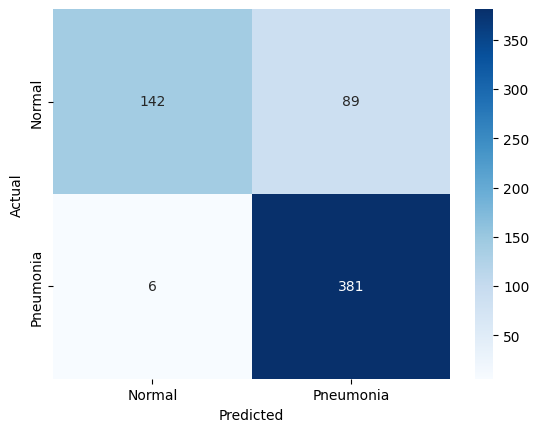

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Normal", "Pneumonia"],
    yticklabels=["Normal", "Pneumonia"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
